In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression  # Исправлено на linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from scipy import stats
sns.set_theme(style='darkgrid')  # или 'whitegrid', 'dark', 'white', 'ticks'

In [9]:
# Загрузка датасета
df = pd.read_csv('Foodpanda Analysis Dataset.csv')

# Вывод базовой информации
print(df.shape)  # Размер датасета
print(df.head())  # Первые строки
print(df.info())  # Информация о типах данных
print(df.describe())  # Статистическое описание
print(df.isna().sum())  # Проверка на пропуски

(6000, 20)
  customer_id  gender     age      city signup_date order_id order_date  \
0       C5663    Male   Adult  Peshawar   1/14/2024    O9663  8/23/2023   
1       C2831    Male   Adult    Multan    7/7/2024    O6831  8/23/2023   
2       C2851   Other  Senior    Multan   6/20/2025    O6851  8/23/2023   
3       C1694  Female  Senior  Peshawar    9/5/2023    O5694  8/23/2023   
4       C4339   Other  Senior    Lahore  12/29/2023    O8339  8/24/2023   

  restaurant_name dish_name category  quantity    price payment_method  \
0      McDonald's    Burger  Italian         5  1478.27           Cash   
1             KFC    Burger  Italian         3   956.04         Wallet   
2       Pizza Hut     Fries  Italian         2   882.51           Cash   
3          Subway     Pizza  Dessert         4   231.30           Card   
4             KFC  Sandwich  Dessert         1  1156.69           Cash   

   order_frequency last_order_date  loyalty_points   churned  rating  \
0               38   

In [10]:
# Преобразование колонок с датами в datetime
date_cols = ['signup_date', 'order_date', 'last_order_date', 'rating_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')  # Добавлено errors='coerce' на случай ошибок

# Добавление дня недели для заказа
df['order_day_of_week'] = df['order_date'].dt.day_name()

# Исправление неверных значений в churned, если есть (например, '5' в сэмпле)
df = df[df['churned'].isin(['Active', 'Inactive'])]

# Предполагаем, что price - это общая цена заказа

# Удаление дубликатов, если есть
df.drop_duplicates(inplace=True)

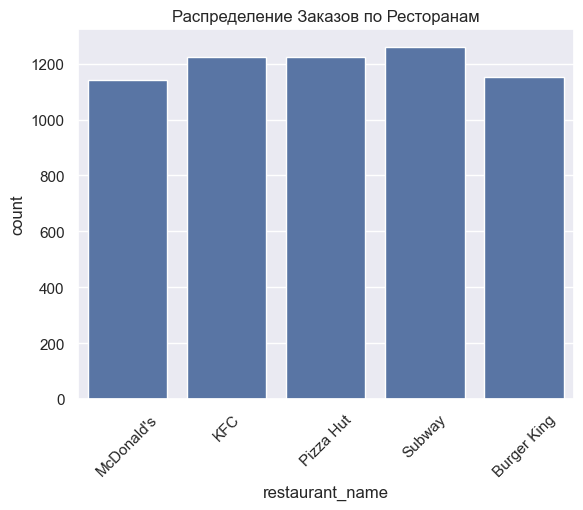

In [11]:
# Построение графика
sns.countplot(x='restaurant_name', data=df)
plt.title('Распределение Заказов по Ресторанам')
plt.xticks(rotation=45)
plt.show()

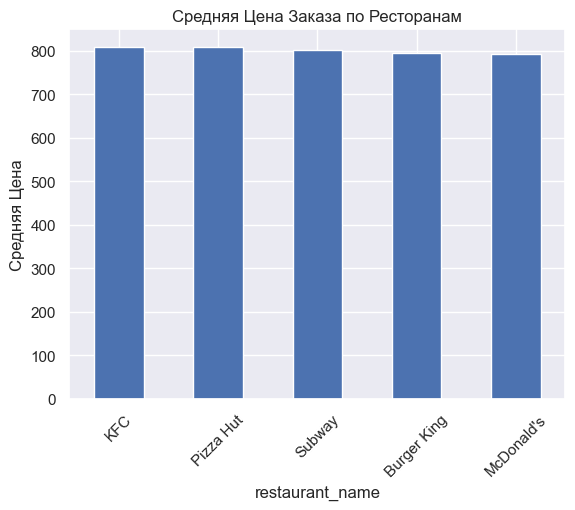

In [12]:
avg_price = df.groupby('restaurant_name')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar')
plt.title('Средняя Цена Заказа по Ресторанам')
plt.ylabel('Средняя Цена')
plt.xticks(rotation=45)
plt.show()

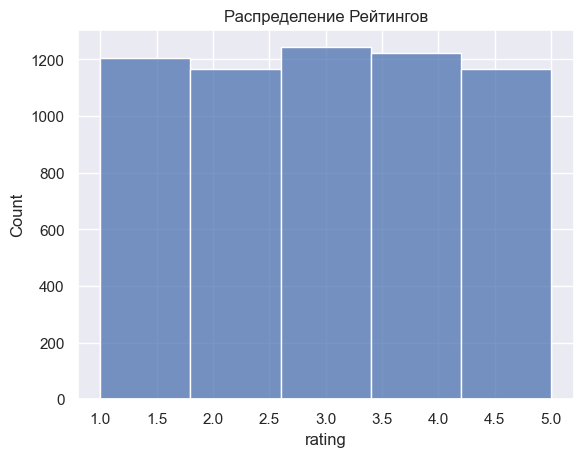

In [13]:
sns.histplot(df['rating'], bins=5)
plt.title('Распределение Рейтингов')
plt.show()

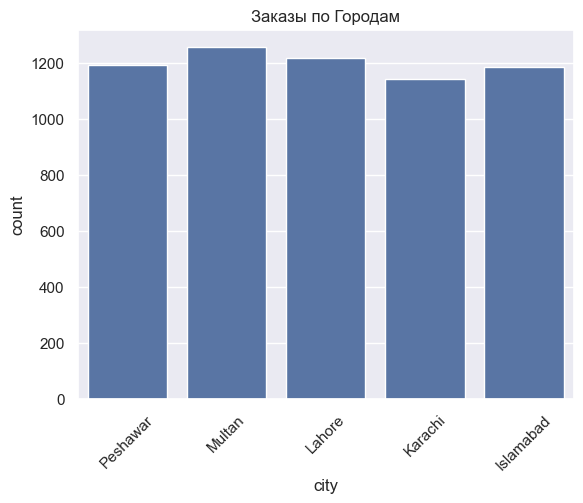

In [ ]:
sns.countplot(x='city', data=df)
plt.title('Заказы по Городам')
plt.xticks(rotation=45)
plt.show()

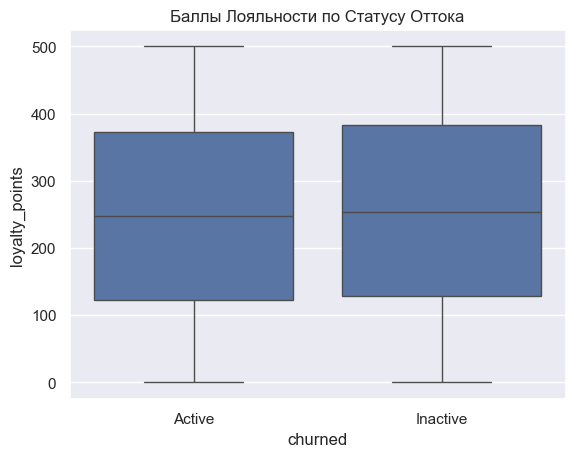

In [ ]:
sns.boxplot(x='churned', y='loyalty_points', data=df)
plt.title('Баллы Лояльности по Статусу Оттока')
plt.show()

In [14]:
avg_rating_churn = df.groupby('churned')['rating'].mean()
print(avg_rating_churn)

# t-тест
active_ratings = df[df['churned'] == 'Active']['rating']
inactive_ratings = df[df['churned'] == 'Inactive']['rating']
t_stat, p_val = stats.ttest_ind(active_ratings, inactive_ratings)
print(f'p-значение: {p_val}')

churned
Active      2.972812
Inactive    3.021113
Name: rating, dtype: float64
p-значение: 0.18341645654063293


In [15]:
churn_rate_city = df.groupby('city')['churned'].apply(lambda x: (x == 'Inactive').mean())
print(churn_rate_city.sort_values(ascending=False))

city
Lahore       0.518488
Multan       0.515924
Islamabad    0.492839
Peshawar     0.478661
Karachi      0.478603
Name: churned, dtype: float64


In [16]:
churn_rate_payment = df.groupby('payment_method')['churned'].apply(lambda x: (x == 'Inactive').mean())
print(churn_rate_payment)

payment_method
Card      0.492507
Cash      0.506130
Wallet    0.493109
Name: churned, dtype: float64


In [17]:
avg_check = df.groupby('restaurant_name')['price'].mean().sort_values(ascending=False)
print(avg_check)
print(f'Высочайший: {avg_check.index[0]} с {avg_check.iloc[0]}')

restaurant_name
KFC            808.157459
Pizza Hut      807.526283
Subway         801.574008
Burger King    793.336429
McDonald's     790.919281
Name: price, dtype: float64
Высочайший: KFC с 808.1574591503268


In [18]:
avg_rating = df.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)
print(avg_rating)
print(f'Высочайший: {avg_rating.index[0]} с {avg_rating.iloc[0]}')

restaurant_name
Subway         3.087302
McDonald's     3.002629
KFC            2.974673
Burger King    2.966116
Pizza Hut      2.949346
Name: rating, dtype: float64
Высочайший: Subway с 3.0873015873015874


In [27]:
orders_by_day = df['order_date'].value_counts()
most_day = orders_by_day.index[0]  # Первая дата
most_count = orders_by_day.iloc[0]  # Количество заказов для первой даты
avg_count = orders_by_day.mean()
times_more = most_count / avg_count
day_name = df[df['order_date'] == most_day]['order_day_of_week'].iloc[0]  # Используем iloc для безопасности
cities = df[df['order_date'] == most_day]['city'].value_counts()

print(f'Больше всего заказов {most_day} ({day_name}), количество: {most_count}, {times_more:.2f} раз выше среднего.')
print('Возможно, связано с выходным или акцией.')
print('Города:', cities)

Больше всего заказов 2024-09-08 00:00:00 (Sunday), количество: 20, 2.43 раз выше среднего.
Возможно, связано с выходным или акцией.
Города: city
Peshawar    7
Multan      7
Lahore      5
Karachi     1
Name: count, dtype: int64


In [21]:
worst_dishes = df.groupby(['restaurant_name', 'dish_name'])['rating'].mean().sort_values().head(10)
print(worst_dishes)

# Связь с днем
low_ratings = df[df['rating'] <= 2]
low_day_dist = low_ratings['order_day_of_week'].value_counts(normalize=True)
overall_day_dist = df['order_day_of_week'].value_counts(normalize=True)
print('Распределение дней для низких рейтингов:', low_day_dist)
print('Общее распределение дней:', overall_day_dist)

restaurant_name  dish_name
Pizza Hut        Pizza        2.795918
Burger King      Pizza        2.828704
KFC              Burger       2.914027
Burger King      Fries        2.922727
KFC              Pasta        2.930041
                 Sandwich     2.930502
McDonald's       Burger       2.943089
Pizza Hut        Fries        2.963470
                 Burger       2.965665
                 Pasta        2.977860
Name: rating, dtype: float64
Распределение дней для низких рейтингов: order_day_of_week
Monday       0.150696
Friday       0.149008
Thursday     0.146053
Sunday       0.143520
Wednesday    0.138033
Saturday     0.136344
Tuesday      0.136344
Name: proportion, dtype: float64
Общее распределение дней: order_day_of_week
Monday       0.148667
Friday       0.146333
Sunday       0.146167
Saturday     0.144000
Thursday     0.144000
Tuesday      0.135500
Wednesday    0.135333
Name: proportion, dtype: float64


In [22]:
customer_orders = df.groupby('customer_id').agg({
    'order_date': ['count', 'min', 'max'],
    'signup_date': 'first'
})
customer_orders.columns = ['order_count', 'first_order', 'last_order', 'signup_date']
customer_orders['period'] = (customer_orders['last_order'] - customer_orders['first_order']).dt.days + 1  # Избежать 0
customer_orders['orders_per_day'] = customer_orders['order_count'] / customer_orders['period']
top = customer_orders.sort_values('orders_per_day', ascending=False).head(1)
print(top)

print(f'Клиент {top.index[0]} сделал {top["order_count"].iloc[0]} заказов за {top["period"].iloc[0]} дней.')

             order_count first_order last_order signup_date  period  \
customer_id                                                           
C1000                  1  2024-11-08 2024-11-08  2024-06-14       1   

             orders_per_day  
customer_id                  
C1000                   1.0  
Клиент C1000 сделал 1 заказов за 1 дней.


In [23]:
# Агрегация по клиентам
customer_df = df.groupby('customer_id').agg({
    'gender': 'first',
    'age': 'first',
    'city': 'first',
    'signup_date': 'first',
    'price': 'mean',  # Средний чек
    'quantity': 'mean',
    'order_frequency': 'first',
    'loyalty_points': 'first',
    'churned': 'first',
    'rating': 'mean',
    'payment_method': lambda x: x.mode()[0] if not x.empty else None,  # Мода
    'delivery_status': lambda x: (x == 'Delivered').mean(),  # Успешность доставки
})

customer_df['order_count'] = df.groupby('customer_id')['order_id'].count()
customer_df['time_since_signup'] = (pd.to_datetime('2025-10-11') - customer_df['signup_date']).dt.days  # Текущая дата
customer_df['avg_price'] = customer_df['price']  # Переименование

# Удаление ненужного
customer_df.drop(['price', 'signup_date'], axis=1, inplace=True)

# Кодирование категориальных
cat_cols = ['gender', 'age', 'city', 'payment_method']
for col in cat_cols:
    le = LabelEncoder()
    customer_df[col] = le.fit_transform(customer_df[col].astype(str))  # Обработка NaN

# Таргет
customer_df['churned'] = (customer_df['churned'] == 'Inactive').astype(int)

# Разделение
X = customer_df.drop('churned', axis=1)
y = customer_df['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print('Метрики Логистической Регрессии:')
print('Точность:', accuracy_score(y_test, y_pred_lr))
print('F1 Счет:', f1_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))

Метрики Логистической Регрессии:
Точность: 0.49916666666666665
F1 Счет: 0.43355325164938735
Precision: 0.5168539325842697
Recall: 0.37337662337662336


In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Деревья не нуждаются в масштабировании
y_pred_rf = rf.predict(X_test)

print('Метрики Случайного Леса:')
print('Точность:', accuracy_score(y_test, y_pred_rf))
print('F1 Счет:', f1_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))

Метрики Случайного Леса:
Точность: 0.5083333333333333
F1 Счет: 0.48695652173913045
Precision: 0.5243445692883895
Recall: 0.45454545454545453


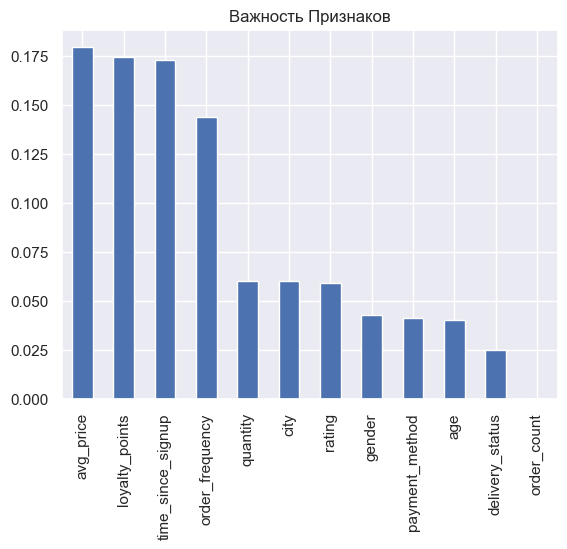

In [26]:
# Важность признаков из RF
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.title('Важность Признаков')
plt.show()